In [1]:
import bs4
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url="https://www.airlinequality.com/airline-reviews/british-airways"
response=requests.get(url)
response.status_code

200

In [3]:
soup=BeautifulSoup(response.text,'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   British Airways Customer Reviews - SKYTRAX
  </title>
  <!-- Google Chrome Frame for IE -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- mobile meta -->
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <!-- icons & favicons -->
  <link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-i

## Scraping all pages

In [31]:
import time
def ref_rev():
    base_url="https://www.airlinequality.com/airline-reviews/british-airways"
    pages=3
    reviews=[]
    dates=[]
    for i in range(1,pages+1):
        url=base_url+"/page/"+str(i)
        response = requests.get(url)
        data=response.text
        soup=BeautifulSoup(data,'html5lib')
        h2_elements = soup.find_all('h2', class_="text_header")
        h3_elements = soup.find_all('time')
        h2_texts = [h2.text for h2 in h2_elements]
        h3_texts = [h3.text for h3 in h3_elements]
        reviews.extend(h2_texts)
        dates.extend(h3_texts)
    return dates,reviews
tim=60
while True:
    ref_rev()
    time.sleep(tim)


KeyboardInterrupt: 

In [32]:
import time
import requests
from bs4 import BeautifulSoup

def ref_rev():
    base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
    pages = 3
    reviews = []
    dates = []

    for i in range(1, pages + 1):
        url = f"{base_url}/page/{i}"
        response = requests.get(url)
        data = response.text
        soup = BeautifulSoup(data, 'html5lib')

        h2_elements = soup.find_all('h2', class_="text_header")
        h3_elements = soup.find_all('time')

        h2_texts = [h2.text for h2 in h2_elements]
        h3_texts = [h3.text for h3 in h3_elements]

        reviews.extend(h2_texts)
        dates.extend(h3_texts)

    return dates, reviews

tim = 30

while True:
    dates, reviews = ref_rev()
    time.sleep(tim)


Dates: ['26th January 2024', '23rd January 2024', '21st January 2024', '18th January 2024', '18th January 2024', '17th January 2024', '16th January 2024', '15th January 2024', '12th January 2024', '12th January 2024', '9th January 2024', '7th January 2024', '3rd January 2024', '2nd January 2024', '29th December 2023', '29th December 2023', '27th December 2023', '27th December 2023', '23rd December 2023', '21st December 2023', '21st December 2023', '21st December 2023', '20th December 2023', '20th December 2023', '18th December 2023', '17th December 2023', '15th December 2023', '14th December 2023', '12th December 2023', '12th December 2023']
Reviews: ['“appalling service”', '“Worst service ever”', '"unprofessional attitude of the pilots" ', '“Next time it will be Jet2”', '“become the Ryanair of long-haul travel”', '“They never help us”', '“uncomfortable seat and disgusting food”', '"Zero customer service"', '"baggage arrival nearly took 1.5 hours" ', '"Overall very satisfied"', '"airli

KeyboardInterrupt: 

In [22]:
reviews

['“appalling service”',
 '“Worst service ever”',
 '"unprofessional attitude of the pilots" ',
 '“Next time it will be Jet2”',
 '“become the Ryanair of long-haul travel”',
 '“They never help us”',
 '“uncomfortable seat and disgusting food”',
 '"Zero customer service"',
 '"baggage arrival nearly took 1.5 hours" ',
 '"Overall very satisfied"',
 '"airline is a total disgrace" ',
 '"we were pleased with the service"',
 '"Gate agent was extremely rude"',
 '"incredibly heartless and incompetent company"',
 '"their service was hit-and-miss"',
 '" Worse than a low-cost carrier"',
 '"Very Poor Business class product"',
 '“if GF - take your own food”',
 '“pathetic business class product”',
 '“Staff look tired and overworked”',
 '“I couldn’t fault them”',
 '“incompetence in customer service”',
 "“The most ridiculous thing I've heard”",
 '"one of the most disgusting onboard meals"',
 '“Does BA pay experts to design these breakfasts”',
 '"business class seats were abysmal"',
 '"Worst service/airline

In [23]:
dates

['26th January 2024',
 '23rd January 2024',
 '21st January 2024',
 '18th January 2024',
 '18th January 2024',
 '17th January 2024',
 '16th January 2024',
 '15th January 2024',
 '12th January 2024',
 '12th January 2024',
 '9th January 2024',
 '7th January 2024',
 '3rd January 2024',
 '2nd January 2024',
 '29th December 2023',
 '29th December 2023',
 '27th December 2023',
 '27th December 2023',
 '23rd December 2023',
 '21st December 2023',
 '21st December 2023',
 '21st December 2023',
 '20th December 2023',
 '20th December 2023',
 '18th December 2023',
 '17th December 2023',
 '15th December 2023',
 '14th December 2023',
 '12th December 2023',
 '12th December 2023']

In [24]:
Set_={'Date':dates,'Customer Review':reviews}
BA_reviews=pd.DataFrame(Set_)
BA_reviews

,Date,Customer Review
0,26th January 2024,“appalling service”
1,23rd January 2024,“Worst service ever”
2,21st January 2024,"""unprofessional attitude of the pilots"""
3,18th January 2024,“Next time it will be Jet2”
4,18th January 2024,“become the Ryanair of long-haul travel”
5,17th January 2024,“They never help us”
6,16th January 2024,“uncomfortable seat and disgusting food”
7,15th January 2024,"""Zero customer service"""
8,12th January 2024,"""baggage arrival nearly took 1.5 hours"""
9,12th January 2024,"""Overall very satisfied"""


In [28]:
BA_reviews["Dates"]=pd.to_datetime(BA_reviews["Date"],format='mixed')
BA_reviews

,Date,Customer Review,Dates
0,26th January 2024,“appalling service”,2024-01-26
1,23rd January 2024,“Worst service ever”,2024-01-23
2,21st January 2024,"""unprofessional attitude of the pilots""",2024-01-21
3,18th January 2024,“Next time it will be Jet2”,2024-01-18
4,18th January 2024,“become the Ryanair of long-haul travel”,2024-01-18
5,17th January 2024,“They never help us”,2024-01-17
6,16th January 2024,“uncomfortable seat and disgusting food”,2024-01-16
7,15th January 2024,"""Zero customer service""",2024-01-15
8,12th January 2024,"""baggage arrival nearly took 1.5 hours""",2024-01-12
9,12th January 2024,"""Overall very satisfied""",2024-01-12


In [7]:
BA_reviews["Customer Review"].value_counts()

Customer Review
“appalling service”                                 1
“Worst service ever”                                1
“our compensation rights"                           1
“Much better experience this time around”           1
"Worst service/airline ever"                        1
"business class seats were abysmal"                 1
“Does BA pay experts to design these breakfasts”    1
"one of the most disgusting onboard meals"          1
“The most ridiculous thing I've heard”              1
“incompetence in customer service”                  1
“I couldn’t fault them”                             1
“Staff look tired and overworked”                   1
“pathetic business class product”                   1
“if GF - take your own food”                        1
"Very Poor Business class product"                  1
" Worse than a low-cost carrier"                    1
"their service was hit-and-miss"                    1
"incredibly heartless and incompetent company"      1
"Gate agent 

In [8]:
value_to_del= 'British Airways customer review'
df = BA_reviews[BA_reviews['Customer Review'] != value_to_del]
df

,Customer Review
0,“appalling service”
1,“Worst service ever”
2,"""unprofessional attitude of the pilots"""
3,“Next time it will be Jet2”
4,“become the Ryanair of long-haul travel”
5,“They never help us”
6,“uncomfortable seat and disgusting food”
7,"""Zero customer service"""
8,"""baggage arrival nearly took 1.5 hours"""
9,"""Overall very satisfied"""


# NLP

In [9]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['Customer Review'].apply(clean)
df

,Customer Review,Cleaned Reviews
0,“appalling service”,appalling service
1,“Worst service ever”,Worst service ever
2,"""unprofessional attitude of the pilots""",unprofessional attitude of the pilots
3,“Next time it will be Jet2”,Next time it will be Jet
4,“become the Ryanair of long-haul travel”,become the Ryanair of long haul travel
5,“They never help us”,They never help us
6,“uncomfortable seat and disgusting food”,uncomfortable seat and disgusting food
7,"""Zero customer service""",Zero customer service
8,"""baggage arrival nearly took 1.5 hours""",baggage arrival nearly took hours
9,"""Overall very satisfied""",Overall very satisfied


In [10]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Customer Review,Cleaned Reviews,POS tagged
0,“appalling service”,appalling service,"[(appalling, v), (service, n)]"
1,“Worst service ever”,Worst service ever,"[(Worst, n), (service, n), (ever, r)]"
2,"""unprofessional attitude of the pilots""",unprofessional attitude of the pilots,"[(unprofessional, a), (attitude, n), (pilots, n)]"
3,“Next time it will be Jet2”,Next time it will be Jet,"[(Next, a), (time, n), (Jet, n)]"
4,“become the Ryanair of long-haul travel”,become the Ryanair of long haul travel,"[(become, v), (Ryanair, n), (long, r), (haul, ..."


In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Customer Review,Cleaned Reviews,POS tagged,Lemma
0,“appalling service”,appalling service,"[(appalling, v), (service, n)]",appal service
1,“Worst service ever”,Worst service ever,"[(Worst, n), (service, n), (ever, r)]",Worst service ever
2,"""unprofessional attitude of the pilots""",unprofessional attitude of the pilots,"[(unprofessional, a), (attitude, n), (pilots, n)]",unprofessional attitude pilot
3,“Next time it will be Jet2”,Next time it will be Jet,"[(Next, a), (time, n), (Jet, n)]",Next time Jet
4,“become the Ryanair of long-haul travel”,become the Ryanair of long haul travel,"[(become, v), (Ryanair, n), (long, r), (haul, ...",become Ryanair long haul travel


## Analyze the Sentiment

In [13]:
!pip install vaderSentiment

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df

,Customer Review,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,“appalling service”,appalling service,"[(appalling, v), (service, n)]",appal service,0.0000,Neutral
1,“Worst service ever”,Worst service ever,"[(Worst, n), (service, n), (ever, r)]",Worst service ever,-0.6249,Negative
2,"""unprofessional attitude of the pilots""",unprofessional attitude of the pilots,"[(unprofessional, a), (attitude, n), (pilots, n)]",unprofessional attitude pilot,-0.5106,Negative
3,“Next time it will be Jet2”,Next time it will be Jet,"[(Next, a), (time, n), (Jet, n)]",Next time Jet,0.0000,Neutral
4,“become the Ryanair of long-haul travel”,become the Ryanair of long haul travel,"[(become, v), (Ryanair, n), (long, r), (haul, ...",become Ryanair long haul travel,0.0000,Neutral
5,“They never help us”,They never help us,"[(never, r), (help, v), (us, None)]",never help us,-0.3089,Negative
6,“uncomfortable seat and disgusting food”,uncomfortable seat and disgusting food,"[(uncomfortable, a), (seat, n), (disgusting, n...",uncomfortable seat disgusting food,-0.7184,Negative
7,"""Zero customer service""",Zero customer service,"[(Zero, n), (customer, n), (service, n)]",Zero customer service,0.0000,Neutral
8,"""baggage arrival nearly took 1.5 hours""",baggage arrival nearly took hours,"[(baggage, n), (arrival, n), (nearly, r), (too...",baggage arrival nearly take hour,0.0000,Neutral
9,"""Overall very satisfied""",Overall very satisfied,"[(Overall, a), (satisfied, a)]",Overall satisfied,0.4215,Neutral


In [15]:
df["Analysis"].value_counts()

Analysis
Negative    17
Neutral     13
Name: count, dtype: int64

<Axes: xlabel='Analysis', ylabel='count'>

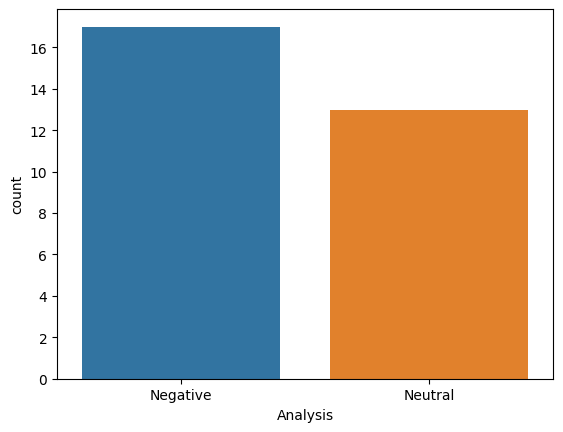

In [16]:
import seaborn as sns
sns.barplot(x=df["Analysis"].value_counts().index, y=df["Analysis"].value_counts())